In [14]:
'''
https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturniansatfact.html
https://github.com/hannorein/rebound/blob/main/ipython_examples/Resonances_of_Jupiters_moons.ipynb

https://rebound.readthedocs.io/en/latest/ipython_examples/OrbitPlot/
https://github.com/hannorein/rebound/blob/main/ipython_examples/Resonances_of_Jupiters_moons.ipynb

'''


'\nhttps://nssdc.gsfc.nasa.gov/planetary/factsheet/saturniansatfact.html\nhttps://github.com/hannorein/rebound/blob/main/ipython_examples/Resonances_of_Jupiters_moons.ipynb\n\nhttps://rebound.readthedocs.io/en/latest/ipython_examples/OrbitPlot/\nhttps://github.com/hannorein/rebound/blob/main/ipython_examples/Resonances_of_Jupiters_moons.ipynb\n\n'

Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Titan'... 
Found: Titan (606) (chosen from query 'Titan')
Searching NASA Horizons for 'Hyperion'... 


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Found: Hyperion (607) 
<rebound.Orbit instance, a=1480188.0304577835 e=0.10157198360735752 inc=0.4720762306676302 Omega=2.957396235930437 omega=1.606277190420501 f=5.816807131222522>
Saturn parameters: 1220476.9067333716 0.02866550843580287 0.48363678857775133 2.950907955565732 3.069843517190714 1.505224124206764 
Titan parameters: 1480188.0304577835 0.10157198360735752 0.4720762306676302 2.957396235930437 1.606277190420501 5.816807131222522 


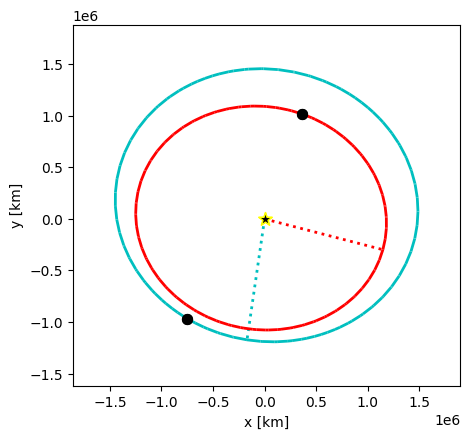

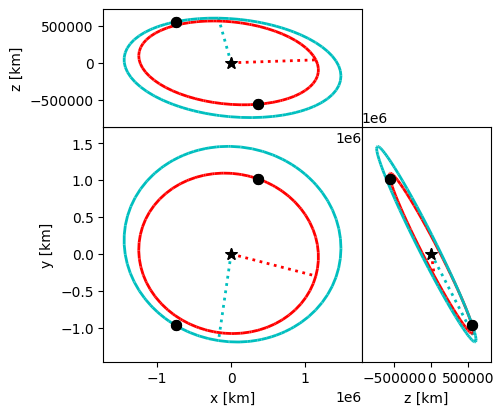

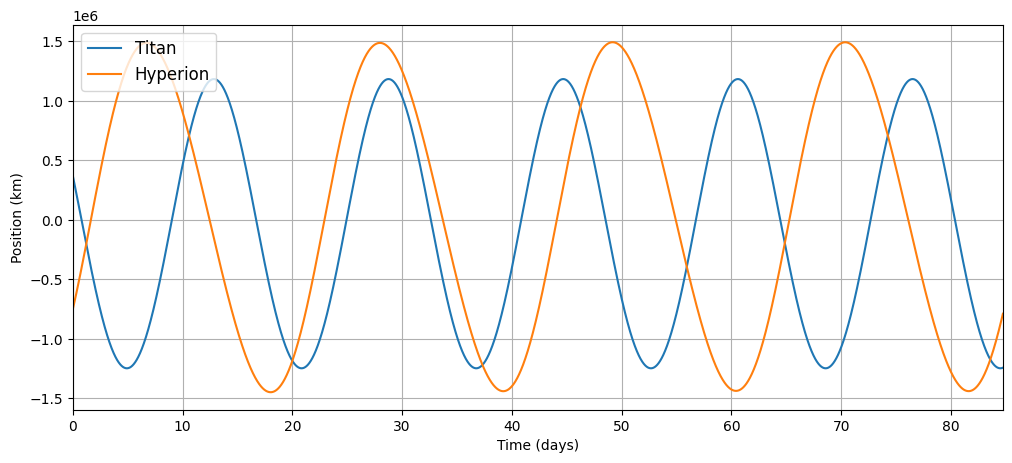

In [8]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

sim = rebound.Simulation()
sim.units = ['msaturn','day','km']
rebound.horizons.SSL_CONTEXT = 'unverified'

labels = ["Saturn", "Titan", "Hyperion"]
sim.add(labels)

os = sim.orbits()
print (os[1])
for i in range(0,2):
    print (f'{labels[i]} parameters: {os[i].a} {os[i].e} {os[i].inc} {os[i].Omega} {os[i].omega} {os[i].f} ')

sim.move_to_com()
op = rebound.OrbitPlot(sim, unitlabel="[km]", color=True, periastron=True, orbit_style="solid", lw=2)
op.primary.set_sizes([100])
op.primary.set_edgecolor("yellow")
op.fig.savefig("OrbitaTitanoIperione.png")

ops = rebound.OrbitPlotSet(sim, unitlabel="[km]", color=True, periastron=True, orbit_style="solid", lw=2)
ops.fig.savefig("OrbitaTitanoIperione3D.png")

sim.integrator = "whfast"
sim.dt = 0.05 * os[1].P  # 5% of Io's period
Nout = 100000            # number of points to display
perc_year = 0.232
tmax = perc_year * 365.25         # let the simulation run for 80 years
Nmoons = 2

x = np.zeros((Nmoons,Nout))
ecc = np.zeros((Nmoons,Nout))
longitude = np.zeros((Nmoons,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum,
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.orbits()
    for j in range(Nmoons):
        x[j][i] = ps[j+1].x
        ecc[j][i] = os[j].e
        longitude[j][i] = os[j].l

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,x[0],label=labels[1])
plt.plot(times,x[1],label=labels[2])
ax.set_xlim(0,perc_year*365.25)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Position (km)")
ax.tick_params()
ax.grid(True)
plt.legend(fontsize=12, loc='upper left')
plt.savefig('RisonanzaIperioneTitano.png')


In [9]:
from scipy import signal
Npts = 4000

# look for periodicities with periods logarithmically spaced between 0.01 yrs and 1 yrs
logPmin = np.log10(0.001*365.25)
logPmax = np.log10(1.*365.25)

# set up a logspaced array from 0.01 to 100 yrs
Ps = np.logspace(logPmin,logPmax,Npts)
# calculate an array of corresponding angular frequencies
ws = np.asarray([2*np.pi/P for P in Ps])

# calculate the periogram (for Io) (using ws as the values for which to compute it)
periodogram_0 = signal.lombscargle(times,x[0],ws)
periodogram_1 = signal.lombscargle(times,x[1],ws)


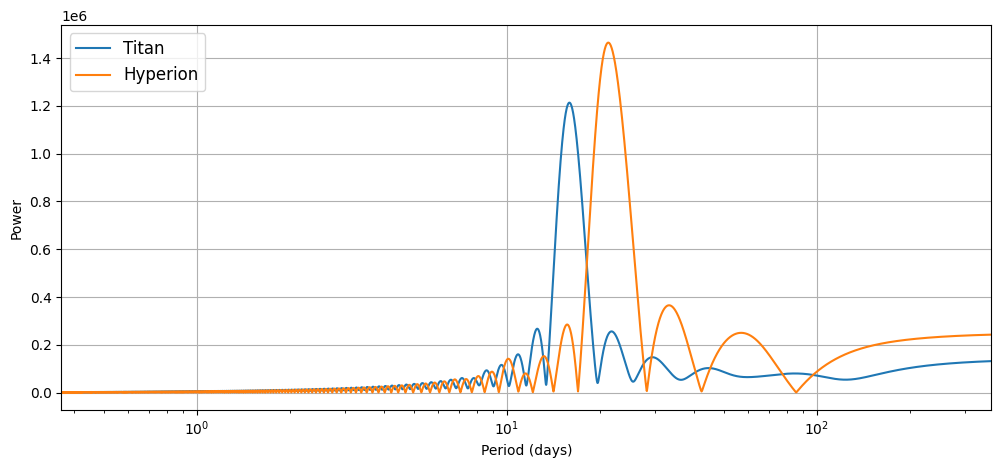

In [10]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

# Since the computed periodogram is unnormalized, taking the value A**2*N/4,
# we renormalize the results by applying these functions inversely to the output:
ax.set_xscale('log')
ax.set_xlim([10**logPmin,10**logPmax])
ax.set_xlabel("Period (days)")
ax.set_ylabel("Power")
ax.plot(Ps,np.sqrt(4*periodogram_0/Nout))
ax.plot(Ps,np.sqrt(4*periodogram_1/Nout))
ax.tick_params()
ax.grid(True)
label_leg = labels[1:3]
plt.legend(label_leg, loc="upper left", fontsize=12)
plt.savefig('PeriodogrammaTitanoIperione.png')

# titano 15.945421
# hiperione 21.276609

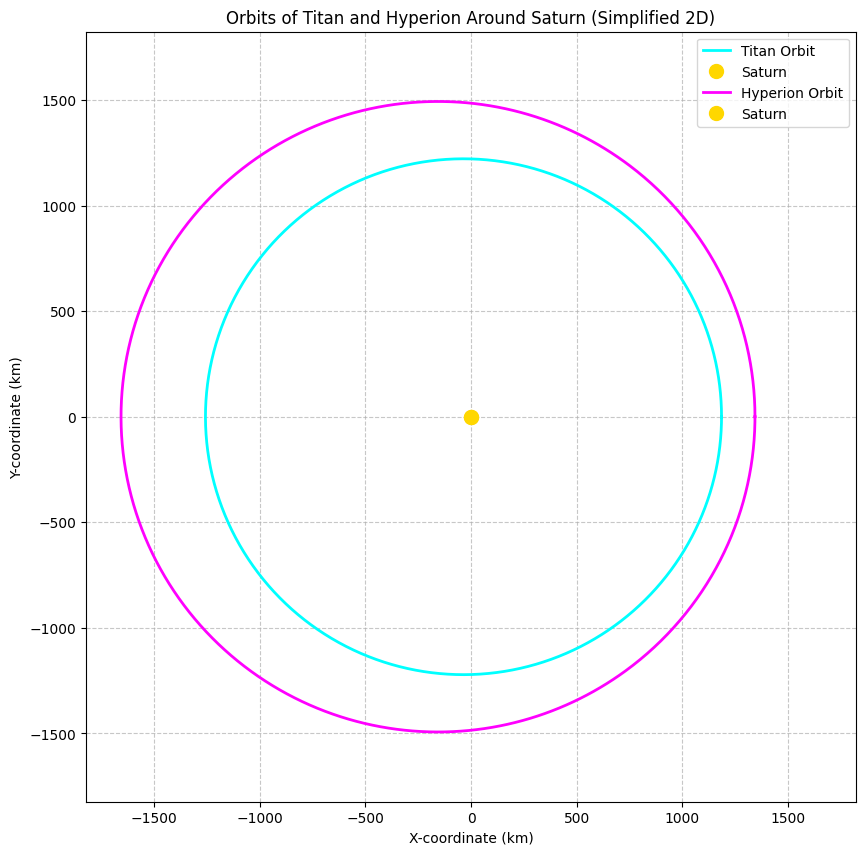

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_orbit(ax, a, e, period, color, label, num_points=1000):
    # Create an array of angles from 0 to 2*pi
    theta = np.linspace(0, 2 * np.pi, num_points)

    # Calculate radius (r) from the polar equation of an ellipse
    r = a * (1 - e**2) / (1 + e * np.cos(theta))

    # Convert polar coordinates (r, theta) to Cartesian coordinates (x, y)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Plot the orbit
    ax.plot(x, y, color=color, linestyle='-', linewidth=2, label=label)

    # Plot the central body (Saturn) at the origin
    ax.plot(0, 0, 'o', color='gold', markersize=10, label='Saturn')

def main():

    # --- Orbital Parameters ---
    # Titan
    titan_a = 1221.87  #  km
    titan_e = 0.0292    # e
    titan_period = 15.945421 # p

    # Hyperion
    hyperion_a = 1500.93 # Semi-major axis in km
    hyperion_e = 0.1042   # e
    hyperion_period = 21.276609 # p

    # --- Plotting Setup ---
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', adjustable='box') # Ensure equal scaling for x and y axes

    # --- Plot Orbits ---
    plot_orbit(ax, titan_a, titan_e, titan_period, 'cyan', 'Titan Orbit')
    plot_orbit(ax, hyperion_a, hyperion_e, hyperion_period, 'magenta', 'Hyperion Orbit')

    # --- Plotting Details ---
    ax.set_title('Orbits of Titan and Hyperion Around Saturn (Simplified 2D)')
    ax.set_xlabel('X-coordinate (km)')
    ax.set_ylabel('Y-coordinate (km)')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

    # Adjust plot limits to fit both orbits and Saturn
    # Find the maximum extent of both orbits to set symmetric limits
    max_extent = max(titan_a * (1 + titan_e), hyperion_a * (1 + hyperion_e)) * 1.1 # Add a bit of padding
    ax.set_xlim([-max_extent, max_extent])
    ax.set_ylim([-max_extent, max_extent])

    plt.show()

if __name__ == '__main__':
    main()
